# regresión lineal

## Plan
* Leer archivos
* Ejecutar Regresión Multilineal
* Ejectutar LGBMRegresor

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [3]:
#trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#petroleo_reg_df=pd.read_csv('2.RESULTADOS/base_reg_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#oro_reg_df=pd.read_csv('2.RESULTADOS/base_reg_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [4]:
#trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#petroleo_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#oro_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [5]:
trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [6]:
trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [7]:
trm_reg_df.set_index('date',inplace=True)

In [8]:
trm_corr_df.describe()

,Unnamed: 0,cuenta,corr,corrPearson,corrKendall,corrSpearman
count,166.000000,166.000000,164.000000,164.000000,164.000000,164.000000
mean,82.500000,42.740964,-0.011946,-0.011946,0.000759,-0.002489
std,48.064193,16.586205,0.192120,0.192120,0.155435,0.205274
min,0.000000,1.000000,-0.425653,-0.425653,-0.404520,-0.488504
25%,41.250000,40.000000,-0.133330,-0.133330,-0.079502,-0.111954
50%,82.500000,43.000000,-0.022012,-0.022012,-0.007535,-0.012773
75%,123.750000,54.500000,0.081338,0.081338,0.068478,0.101271
max,165.000000,73.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
trm_corr_df

,Unnamed: 0,id,cuenta,corr,corrPearson,corrKendall,corrSpearman,tipo
0,0,twitter_MantillaIgnacio,73,-0.164284,-0.164284,-0.122931,-0.183113,twitter
1,1,twitter_BancoRepublica,73,-0.207368,-0.207368,-0.096326,-0.150364,twitter
2,2,twitter_NASA,72,0.033665,0.033665,0.059088,0.081244,twitter
3,3,twitter_Fondosdepension,71,-0.064374,-0.064374,-0.012490,-0.035985,twitter
4,4,twitter_ecofeminita,71,-0.038067,-0.038067,-0.050383,-0.077909,twitter
...,...,...,...,...,...,...,...,...
161,161,twitter_alhosu,6,0.188896,0.188896,0.066667,0.142857,twitter
162,162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.209037,0.209037,0.400000,0.500000,rss
163,163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000,twitter
164,164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [10]:
#eliminar estas columnas
trm_corr_df[trm_corr_df['cuenta']<5]['id'].values

array(['twitter_NoelMllr', 'twitter_jscorrales', 'twitter_RaquelBernal3'],
      dtype=object)

In [11]:
trm_reg_df.shape

(74, 167)

In [12]:
trm_reg_df.drop(columns=trm_corr_df[trm_corr_df['cuenta']<5]['id'].values,inplace=True)

In [13]:
#quitar nullos
trm_reg_df=trm_reg_df[trm_reg_df['Diferencia'].notnull()]

In [14]:
val=trm_reg_df.isnull().sum().to_frame()
val

,0
rss_http://elnacional.com.do/feed/,0
rss_http://ep00.epimg.net/rss/economia/portada.xml,0
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,0
rss_http://feeds.nytimes.com/nyt/rss/Business,0
rss_http://feeds.nytimes.com/nyt/rss/Technology,0
...,...
twitter_rodriguezbraun,0
twitter_sergiodigra,0
twitter_suanzes,0
twitter_wef,0


In [15]:
val[val[0]>0]

,0


In [16]:
val2=trm_reg_df.sum().to_frame()
val2

,0
rss_http://elnacional.com.do/feed/,-21.746243
rss_http://ep00.epimg.net/rss/economia/portada.xml,-14.305312
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,7.401487
rss_http://feeds.nytimes.com/nyt/rss/Business,-0.230624
rss_http://feeds.nytimes.com/nyt/rss/Technology,-1.374212
...,...
twitter_rodriguezbraun,-30.802803
twitter_sergiodigra,-22.638226
twitter_suanzes,-27.107259
twitter_wef,15.973522


In [17]:
val2[val2[0]==0]

,0


In [18]:
trm_reg_df

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.000000,0.000000,-14.25
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.776667,0.000000,0.000000,8.70
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.85
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,36.90
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,-9.00
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,-10.15
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-9.30


In [19]:
y_train = trm_reg_df['Diferencia']
X_train = trm_reg_df.drop(columns=['Diferencia'])

### División columnas en lotes

In [20]:
X_train.shape

(74, 163)

In [21]:
X_train1  = X_train.iloc[: , :55]

In [22]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,rss_http://rssfeeds.usatoday.com/UsatodaycomNa...,223.65
0,rss_http://elnacional.com.do/feed/,151.70
31,rss_http://www.eltiempo.com/rss/economia.xml,114.09
36,rss_http://www.eltiempo.com/rss/mundo.xml,75.52
40,rss_http://www.eltiempo.com/rss/tecnosfera.xml,69.00
33,rss_http://www.eltiempo.com/rss/economia_finan...,68.87
17,rss_http://feeds.washingtonpost.com/rss/world,65.55
38,rss_http://www.eltiempo.com/rss/mundo_europa.xml,65.32
30,rss_http://www.eltiempo.com/rss/deportes.xml,62.92
35,rss_http://www.eltiempo.com/rss/economia_secto...,56.92


In [23]:
#Seleccionar VIF menores a 50
seleccionColumnas1= vif[vif['VIF']<50]['Features'].values

In [24]:
X_train1=X_train1[seleccionColumnas1]

In [25]:
len(seleccionColumnas1)

44

In [26]:
X_train_lm = sm.add_constant(X_train1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                 -0.226
Method:                 Least Squares   F-statistic:                    0.6942
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.866
Time:                        13:09:53   Log-Likelihood:                -298.32
No. Observations:                  74   AIC:                             686.6
Df Residuals:                      29   BIC:                             790.3
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       5.4681      9.637      0.567      0.575     -14.242      25.178
rss_http://feeds.washingtonpost.com/rss/sports                            159.9829    135.673      1.179      0.248    -117.500     437.466
rss_http://www.portafolio.co/rss/economia                                   3.7577     24.081      0.156      0.877     -45.493      53.009
rss_http://www.portafolio.co/rss/economia/finanzas                         19.1705     20.799      0.922      0.364     -23.368      61.709
rss_http://www.nytimes.com/services/xml/rss/nyt/World.xml                  -6.6581     45.677     -0.146      0.885    -100.078      86.762
rss_http://feeds.washingtonpost.com/rss/national                          -26.0224     24.000     -1.084      0.287     -75.107      23.062
rss_http://feeds.washingtonpost.com/rss/rss_morning-mix                     5.1199     22.620      0.226      0.823     -41.142      51.382
rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories                   -8.8964     12.249     -0.726      0.473     -33.949      16.156
rss_http://feeds.washingtonpost.com/rss/rss_blogpost                       19.4641     24.756      0.786      0.438     -31.167      70.096
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml                -36.2751     31.101     -1.166      0.253     -99.884      27.333
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml              -19.2031     43.517     -0.441      0.662    -108.204      69.798
rss_http://feeds.washingtonpost.com/rss/rss_monkey-cage                    12.7595     18.284      0.698      0.491     -24.635      50.154
rss_http://rss.cnn.com/rss/edition_world.rss                              -33.7549     22.860     -1.477      0.151     -80.508      12.998
rss_http://portafolio.co/rss/mis-finanzas                                   5.9233     10.583      0.560      0.580     -15.721      27.567
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml                    16.9575     17.540      0.967      0.342     -18.917      52.832
rss_http://feeds.washingtonpost.com/rss/rss_powerpost                      14.8138     28.754      0.515      0.610     -43.995      73.622
rss_http://portafolio.co/rss/mis-finanzas/vivienda                         -9.4394     11.475     -0.823      0.417     -32.909      14.030
rss_http://feeds.washingtonpost.com/rss/rss_innovations                   -21.7875     22.180     -0.982      0.334     -67.151      23.576
rss_http://www.eltiempo.com/rss/economia_empresas.xml                       2.0215     12.076      0.167      0.868     -22.677      26.720
rss

In [27]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_http://feeds.washingtonpost.com/rss/sports,0.247911
rss_http://feeds.washingtonpost.com/rss/national,0.287170
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml,0.252968
rss_http://rss.cnn.com/rss/edition_world.rss,0.150558
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker,0.169287
rss_http://feeds.washingtonpost.com/rss/rss_the-fix,0.167272
rss_http://portafolio.co/rss/tendencias/sociales,0.091859


In [28]:
seleccionColumnas1=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas1

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://feeds.washingtonpost.com/rss/national',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml',
       'rss_http://rss.cnn.com/rss/edition_world.rss',
       'rss_http://feeds.washingtonpost.com/rss/rss_fact-checker',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://portafolio.co/rss/tendencias/sociales'], dtype=object)

### Grupo 2

In [29]:
X_train2  = X_train.iloc[: , 55:110]

In [30]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rss_http://www.portafolio.co/rss/negocios/empr...,678.66
4,rss_http://www.portafolio.co/rss/negocios,529.38
31,twitter_CaracolRadio,422.47
34,twitter_ELTIEMPO,339.88
28,twitter_BluRadioCo,270.48
23,rss_https://www.eltiempo.com/rss/politica.xml,227.29
19,rss_https://www.eltiempo.com/rss/justicia.xml,199.38
9,rss_http://www.reforma.com/rss/portada.xml,112.26
8,rss_http://www.reforma.com/rss/negocios.xml,102.37
6,rss_http://www.reforma.com/rss/internacional.xml,67.37


In [31]:
#Seleccionar VIF menores a 50
seleccionColumnas2= vif[vif['VIF']<50]['Features'].values

In [32]:
len(seleccionColumnas2)

45

In [33]:
X_train2=X_train2[seleccionColumnas2]

In [34]:
X_train_lm = sm.add_constant(X_train2)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.9805
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.533
Time:                        13:09:53   Log-Likelihood:                -289.93
No. Observations:                  74   AIC:                             671.9
Df Residuals:                      28   BIC:                             777.8
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                       -37.5439     24.628     -1.524      0.139     -87.992      12.904
rss_https://www.clarin.com/rss/lo-ultimo/                     7.0663     28.276      0.250      0.804     -50.855      64.988
twitter_Fondosdepension                                     -10.7661     17.612     -0.611      0.546     -46.843      25.310
twitter_BancoRepublica                                      -25.4471     23.818     -1.068      0.294     -74.237      23.343
rss_https://www.elcomercio.com/feed/                          9.7179     22.788      0.426      0.673     -36.961      56.397
rss_https://www.clarin.com/rss/economia/                    -10.2895     20.725     -0.496      0.623     -52.742      32.163
rss_http://www.portafolio.co/rss/internacional                2.0660     21.313      0.097      0.923     -41.592      45.724
rss_http://www.reforma.com/rss/justicia.xml                  19.1275     15.591      1.227      0.230     -12.809      51.064
rss_https://www.eltiempo.com/rss/mundo_latinoamerica.xml     -3.5288     12.661     -0.279      0.783     -29.463      22.405
twitter_AlbertoBernalLE                                      -0.7554     20.554     -0.037      0.971     -42.858      41.347
twitter_BvcColombia                                          15.5319     14.673      1.059      0.299     -14.523      45.587
twitter_LuisFelipeHenao                                     -16.6002     13.962     -1.189      0.244     -45.201      12.000
twitter_IECarballo                                          -18.0689     15.156     -1.192      0.243     -49.114      12.976
rss_https://www.eltiempo.com/rss/mundo_eeuu-y-canada.xml     -8.6824     14.704     -0.590      0.560     -38.803      21.438
twitter_JorgeATovar                                          12.0613     11.349      1.063      0.297     -11.187      35.310
twitter_JorgeARestrepo                                        3.1075     13.792      0.225      0.823     -25.143      31.358
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml           -24.4541     36.111     -0.677      0.504     -98.424      49.516
twitter_MantillaIgnacio                                     -19.8524     11.075     -1.793      0.084     -42.538       2.833
rss_http://www.portafolio.co/rss/economia/gobierno           -7.7475     18.639     -0.416      0.681     -45.928      30.433
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml             -18.8548     20.055     -0.940      0.355     -59.936      22.227
twitter_MailOnline                                          -17.2016     73.846     -0.233      0.818    -168.468     134.065
twitter_FT                                                 

In [35]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
const,0.138611
twitter_BancoRepublica,0.294472
rss_http://www.reforma.com/rss/justicia.xml,0.230096
twitter_BvcColombia,0.298844
twitter_LuisFelipeHenao,0.244456
twitter_IECarballo,0.243183
twitter_JorgeATovar,0.296989
twitter_MantillaIgnacio,0.083851
twitter_FT,0.128580
twitter_Jllanosala,0.040859


In [36]:
seleccionColumnas2=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas2

array(['const', 'twitter_BancoRepublica',
       'rss_http://www.reforma.com/rss/justicia.xml',
       'twitter_BvcColombia', 'twitter_LuisFelipeHenao',
       'twitter_IECarballo', 'twitter_JorgeATovar',
       'twitter_MantillaIgnacio', 'twitter_FT', 'twitter_Jllanosala',
       'rss_https://feeds.a.dj.com/rss/RSSOpinion.xml',
       'twitter_Adcamach', 'twitter_Anamibanez', 'twitter_MauricioCard'],
      dtype=object)

### Grupo 3

In [37]:
X_train3  = X_train.iloc[: , 110:]

In [38]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,twitter_elcolombiano,439.43
22,twitter_bbcmundo,389.55
11,twitter_PublimetroCol,343.50
40,twitter_lafm,322.12
8,twitter_NoticiasRCN,262.38
13,twitter_RevistaSemana,245.85
7,twitter_NoticiasCaracol,212.68
47,twitter_rcnmundo,211.14
29,twitter_elespectador,208.53
10,twitter_Portafolioco,200.75


In [39]:
#Seleccionar VIF menores a 50
seleccionColumnas3= vif[vif['VIF']<50]['Features'].values

In [40]:
len(seleccionColumnas3)

37

In [41]:
X_train3=X_train3[seleccionColumnas3]

In [42]:
X_train_lm = sm.add_constant(X_train3)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                 -0.167
Method:                 Least Squares   F-statistic:                    0.7182
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.840
Time:                        13:09:54   Log-Likelihood:                -304.48
No. Observations:                  74   AIC:                             685.0
Df Residuals:                      36   BIC:                             772.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -13.2750     17.223     -0.771      0.446     -48.205      21.655
twitter_epeconomia         16.1723     15.002      1.078      0.288     -14.254      46.598
twitter_MinHacienda        -3.2409     16.731     -0.194      0.847     -37.174      30.692
twitter_Moliverag         -11.0921     16.585     -0.669      0.508     -44.728      22.544
twitter_josecdiez           3.3837     15.464      0.219      0.828     -27.980      34.747
twitter_RobertoAnguloS     15.2657     19.981      0.764      0.450     -25.258      55.790
twitter_NBCNews            23.2722     37.300      0.624      0.537     -52.375      98.920
twitter_rchicave          -38.9469     16.153     -2.411      0.021     -71.707      -6.187
twitter_rodriguezbraun      7.4920     19.009      0.394      0.696     -31.060      46.044
twitter_Minvivienda        -6.7559     12.939     -0.522      0.605     -32.997      19.485
twitter_agaviriau          -6.5978     14.751     -0.447      0.657     -36.514      23.319
twitter_wef               -49.6198     33.253     -1.492      0.144    -117.060      17.821
twitter_OskarNupia         20.0617     15.157      1.324      0.194     -10.679      50.802
twitter_mariovalencia01     1.7183     11.892      0.144      0.886     -22.399      25.836
twitter_jrobertoacosta1   -20.1376     11.362     -1.772      0.085     -43.180       2.905
twitter__minecogob          2.2778     13.996      0.163      0.872     -26.108      30.663
twitter_NASA                4.0948     18.643      0.220      0.827     -33.715      41.905
twitter_ecofeminita        -9.3907     11.369     -0.826      0.414     -32.448      13.667
twitter_Victor_Malagon      9.7553     12.364      0.789      0.435     -15.319      34.830
twitter_suanzes             6.9749     13.320      0.524      0.604     -20.039      33.989
twitter_freddykastro       -2.7297      8.287     -0.329      0.744     -19.536      14.077
twitter_Rohgal              3.4207     10.063      0.340      0.736     -16.989      23.830
twitter_castellanosgd     -11.0375      7.878     -1.401      0.170     -27.015       4.940
twitter_japebu             -1.2285      8.023     -0.153      0.879     -17.500      15.043
twitter_sergiodigra         3.9232      7.933      0.495      0.624     -12.166      20.012
twitter_mahofste           -8.6298      9.863     -0.875      0.387     -28.633      11.373
twitter_jleibovi            1.8865      6.627      0.285      0.778     -11.554      15.328
twitter_estebanpie         -3.7036      9.455     -0.392      0.698     -22.878      15.471
twitter_rafaelpuyana       15.6512     10.628      1.473      0.150      -5.904      37.206
twitter_juanf_vargas       -4.2521      8.403     -0.506      0.616     -21.295      12.790
twitter_RodLuisAlberto     -6.9204      8.815  

In [43]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
twitter_epeconomia,0.288208
twitter_rchicave,0.021132
twitter_wef,0.144363
twitter_OskarNupia,0.193993
twitter_jrobertoacosta1,0.084787
twitter_castellanosgd,0.169769
twitter_rafaelpuyana,0.149542
twitter_mpapell,0.206245
twitter_carlos_g_ospino,0.198287


In [44]:
seleccionColumnas3=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas3

array(['twitter_epeconomia', 'twitter_rchicave', 'twitter_wef',
       'twitter_OskarNupia', 'twitter_jrobertoacosta1',
       'twitter_castellanosgd', 'twitter_rafaelpuyana', 'twitter_mpapell',
       'twitter_carlos_g_ospino'], dtype=object)

### Analisis columans seleccionadas

In [45]:
len(seleccionColumnas3)

9

In [46]:
print( len(seleccionColumnas1) , len(seleccionColumnas2), len(seleccionColumnas3))

7 14 9


In [47]:
seleccionColumnas_fin=np.concatenate((seleccionColumnas1 , seleccionColumnas2, seleccionColumnas3))

In [48]:
seleccionColumnas_fin=np.delete(seleccionColumnas_fin, np.where(seleccionColumnas_fin=='const'))
seleccionColumnas_fin

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://feeds.washingtonpost.com/rss/national',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml',
       'rss_http://rss.cnn.com/rss/edition_world.rss',
       'rss_http://feeds.washingtonpost.com/rss/rss_fact-checker',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://portafolio.co/rss/tendencias/sociales',
       'twitter_BancoRepublica',
       'rss_http://www.reforma.com/rss/justicia.xml',
       'twitter_BvcColombia', 'twitter_LuisFelipeHenao',
       'twitter_IECarballo', 'twitter_JorgeATovar',
       'twitter_MantillaIgnacio', 'twitter_FT', 'twitter_Jllanosala',
       'rss_https://feeds.a.dj.com/rss/RSSOpinion.xml',
       'twitter_Adcamach', 'twitter_Anamibanez', 'twitter_MauricioCard',
       'twitter_epeconomia', 'twitter_rchicave', 'twitter_wef',
       'twitter_OskarNupia', 'twitter_jrobertoacosta1',
       'twitter_castellanosgd', 'twitter_rafaelpuyana', '

In [49]:
len(seleccionColumnas_fin)

29

In [50]:
# mirar si en las seleccionadas están las de mayor correlación

In [51]:
X_train_f=X_train[seleccionColumnas_fin]

In [52]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_f.columns
vif['VIF'] = [variance_inflation_factor(X_train_f.values, i) for i in range(X_train_f.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,twitter_BancoRepublica,17.70
8,rss_http://www.reforma.com/rss/justicia.xml,15.31
20,twitter_epeconomia,14.20
10,twitter_LuisFelipeHenao,10.85
23,twitter_OskarNupia,10.51
11,twitter_IECarballo,9.82
12,twitter_JorgeATovar,9.20
21,twitter_rchicave,9.03
9,twitter_BvcColombia,8.89
22,twitter_wef,8.01


In [53]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_f)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     2.838
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           0.000882
Time:                        13:09:54   Log-Likelihood:                -285.92
No. Observations:                  74   AIC:                             631.8
Df Residuals:                      44   BIC:                             701.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        -15.3774     14.217     -1.082      0.285     -44.030      13.275
rss_http://feeds.washingtonpost.com/rss/sports                44.1381     69.021      0.639      0.526     -94.965     183.241
rss_http://feeds.washingtonpost.com/rss/national              -0.9356     15.337     -0.061      0.952     -31.845      29.973
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml    -0.1925     14.966     -0.013      0.990     -30.354      29.969
rss_http://rss.cnn.com/rss/edition_world.rss                 -29.2721     11.720     -2.498      0.016     -52.893      -5.651
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker      10.7770     11.448      0.941      0.352     -12.294      33.848
rss_http://feeds.washingtonpost.com/rss/rss_the-fix           -0.7502      9.578     -0.078      0.938     -20.053      18.553
rss_http://portafolio.co/rss/tendencias/sociales             -11.3909      8.223     -1.385      0.173     -27.963       5.181
twitter_BancoRepublica                                       -14.2393     11.705     -1.216      0.230     -37.830       9.351
rss_http://www.reforma.com/rss/justicia.xml                   16.9151     10.814      1.564      0.125      -4.880      38.710
twitter_BvcColombia                                            6.9869      8.718      0.801      0.427     -10.583      24.557
twitter_LuisFelipeHenao                                      -23.4969      8.915     -2.636      0.012     -41.463      -5.531
twitter_IECarballo                                             2.8300      9.955      0.284      0.778     -17.233      22.893
twitter_JorgeATovar                                           11.9612      7.067      1.692      0.098      -2.282      26.204
twitter_MantillaIgnacio                                      -22.0746      7.584     -2.911      0.006     -37.359      -6.790
twitter_FT                                                   -44.8923     46.928     -0.957      0.344    -139.470      49.686
twitter_Jllanosala                                           -16.3984      6.023     -2.723      0.009     -28.537      -4.259
rss_https://feeds.a.dj.com/rss/RSSOpinion.xml                -34.0584     16.485     -2.066      0.045     -67.281      -0.836
twitter_Adcamach                                              11.5796      6.056      1.912      0.062      -0.626      23.785
twitter_Anamibanez                                             7.1704      5.125      1.399      0.169      -3.159      17.500
twitter_MauricioCard                                           6.9774      4.842      1.441      0.157      -2.782      16.737
twitter_epeconomia                 

In [54]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
const,0.285316
rss_http://rss.cnn.com/rss/edition_world.rss,0.016320
rss_http://portafolio.co/rss/tendencias/sociales,0.172948
twitter_BancoRepublica,0.230281
rss_http://www.reforma.com/rss/justicia.xml,0.124950
twitter_LuisFelipeHenao,0.011550
twitter_JorgeATovar,0.097624
twitter_MantillaIgnacio,0.005640
twitter_Jllanosala,0.009251
rss_https://feeds.a.dj.com/rss/RSSOpinion.xml,0.044741


In [55]:
#seleccion adicional para validar
seleccionColumnas_cf=pvalue[pvalue['pvalue']<=0.3].index.values

In [56]:
seleccionColumnas_cf=np.delete(seleccionColumnas_cf, np.where(seleccionColumnas_cf=='const'))
seleccionColumnas_cf

array(['rss_http://rss.cnn.com/rss/edition_world.rss',
       'rss_http://portafolio.co/rss/tendencias/sociales',
       'twitter_BancoRepublica',
       'rss_http://www.reforma.com/rss/justicia.xml',
       'twitter_LuisFelipeHenao', 'twitter_JorgeATovar',
       'twitter_MantillaIgnacio', 'twitter_Jllanosala',
       'rss_https://feeds.a.dj.com/rss/RSSOpinion.xml',
       'twitter_Adcamach', 'twitter_Anamibanez', 'twitter_MauricioCard',
       'twitter_OskarNupia', 'twitter_castellanosgd',
       'twitter_carlos_g_ospino'], dtype=object)

In [57]:
X_train_cf=X_train[seleccionColumnas_cf]

In [58]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_cf.columns
vif['VIF'] = [variance_inflation_factor(X_train_cf.values, i) for i in range(X_train_cf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,twitter_BancoRepublica,14.15
12,twitter_OskarNupia,7.18
4,twitter_LuisFelipeHenao,7.04
5,twitter_JorgeATovar,6.79
3,rss_http://www.reforma.com/rss/justicia.xml,4.58
7,twitter_Jllanosala,3.58
6,twitter_MantillaIgnacio,3.57
13,twitter_castellanosgd,2.69
0,rss_http://rss.cnn.com/rss/edition_world.rss,1.39
11,twitter_MauricioCard,1.36


In [59]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_cf)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5.835
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           4.13e-07
Time:                        13:09:54   Log-Likelihood:                -290.90
No. Observations:                  74   AIC:                             613.8
Df Residuals:                      58   BIC:                             650.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                              -22.5096     10.346     -2.176      0.034     -43.220      -1.799
rss_http://rss.cnn.com/rss/edition_world.rss       -29.0650      8.775     -3.312      0.002     -46.630     -11.500
rss_http://portafolio.co/rss/tendencias/sociales    -8.3322      6.545     -1.273      0.208     -21.434       4.769
twitter_BancoRepublica                             -15.8001      8.957     -1.764      0.083     -33.730       2.130
rss_http://www.reforma.com/rss/justicia.xml         17.8830      5.397      3.314      0.002       7.080      28.686
twitter_LuisFelipeHenao                            -19.7393      6.642     -2.972      0.004     -33.034      -6.445
twitter_JorgeATovar                                 11.0386      5.845      1.888      0.064      -0.662      22.740
twitter_MantillaIgnacio                            -20.8004      5.651     -3.681      0.001     -32.112      -9.489
twitter_Jllanosala                                 -19.2167      4.591     -4.186      0.000     -28.406     -10.027
rss_https://feeds.a.dj.com/rss/RSSOpinion.xml      -33.6400     12.784     -2.631      0.011     -59.231      -8.050
twitter_Adcamach                                    11.2296      4.815      2.332      0.023       1.592      20.867
twitter_Anamibanez                                   6.6368      4.418      1.502      0.138      -2.207      15.481
twitter_MauricioCard                                 6.3047      4.039      1.561      0.124      -1.780      14.389
twitter_OskarNupia                                  17.3572      7.552      2.298      0.025       2.240      32.474
twitter_castellanosgd                              -13.0271      3.959     -3.291      0.002     -20.952      -5.102
twitter_carlos_g_ospino                             11.5414      4.996      2.310      0.024       1.541      21.542
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.528
Skew:                           0.121   Prob(JB):                        0.768
Kurtosis:                       2.665   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicciones???

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [62]:
### Entrenar sobre el train

In [63]:
# lleva a conclusiones  grafica
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     3.963
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           0.000118
Time:                        13:09:55   Log-Likelihood:                -252.71
No. Observations:                  66   AIC:                             537.4
Df Residuals:                      50   BIC:                             572.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                              -18.9220     10.071     -1.879      0.066     -39.150       1.306
rss_http://rss.cnn.com/rss/edition_world.rss       -27.5970      8.387     -3.291      0.002     -44.442     -10.752
rss_http://portafolio.co/rss/tendencias/sociales   -10.6045      7.040     -1.506      0.138     -24.746       3.537
twitter_BancoRepublica                             -14.8266      8.824     -1.680      0.099     -32.549       2.896
rss_http://www.reforma.com/rss/justicia.xml         14.8258      5.179      2.863      0.006       4.423      25.228
twitter_LuisFelipeHenao                            -15.5491      6.370     -2.441      0.018     -28.343      -2.755
twitter_JorgeATovar                                 11.5465      5.903      1.956      0.056      -0.309      23.402
twitter_MantillaIgnacio                            -18.2129      5.672     -3.211      0.002     -29.606      -6.819
twitter_Jllanosala                                 -16.5082      4.601     -3.588      0.001     -25.750      -7.266
rss_https://feeds.a.dj.com/rss/RSSOpinion.xml      -21.5578     15.525     -1.389      0.171     -52.740       9.624
twitter_Adcamach                                    12.3374      4.688      2.632      0.011       2.922      21.753
twitter_Anamibanez                                   7.3014      4.158      1.756      0.085      -1.050      15.653
twitter_MauricioCard                                 5.4284      3.782      1.435      0.157      -2.167      13.024
twitter_OskarNupia                                  15.9161      7.882      2.019      0.049       0.084      31.749
twitter_castellanosgd                              -12.3023      3.934     -3.127      0.003     -20.204      -4.401
twitter_carlos_g_ospino                              8.6009      4.883      1.761      0.084      -1.207      18.409
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.289
Skew:                           0.110   Prob(JB):                        0.865
Kurtosis:                       2.763   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-03-16   -17.987354
2022-04-13    12.455749
2022-02-16    -4.674491
2022-03-02   -25.235437
2022-03-08    29.992802
2022-03-14    37.753743
2022-02-24    16.736030
2022-01-27     1.414892
dtype: float64

In [65]:
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error

In [66]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 

In [67]:
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 20.996467717770937   MAPE: 3.180006686733305


In [68]:
resultados_reg=lr_1_r.params.to_frame('coef')

In [69]:
resultados_reg['coef_abs']=resultados_reg['coef'].abs()
resultados_reg=resultados_reg.sort_values('coef_abs', ascending=True)

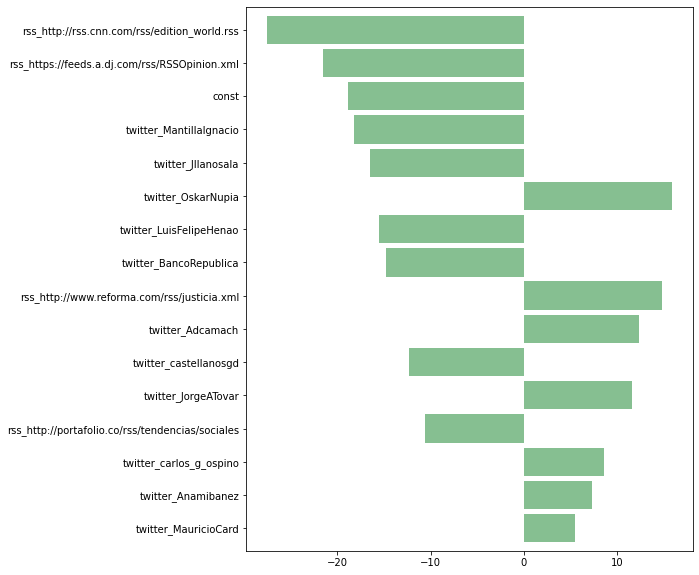

In [70]:
ax = resultados_reg['coef'].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [71]:
## validación con otro conjunto de variables

In [72]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [73]:
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2.040
Date:                Thu, 28 Apr 2022   Prob (F-statistic):             0.0216
Time:                        13:09:55   Log-Likelihood:                -246.49
No. Observations:                  66   AIC:                             553.0
Df Residuals:                      36   BIC:                             618.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -8.6257     14.089     -0.612      0.544     -37.199      19.948
rss_http://feeds.washingtonpost.com/rss/sports                18.7642     69.917      0.268      0.790    -123.035     160.563
rss_http://feeds.washingtonpost.com/rss/national               2.0135     16.701      0.121      0.905     -31.857      35.884
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml    10.0415     14.701      0.683      0.499     -19.774      39.857
rss_http://rss.cnn.com/rss/edition_world.rss                 -33.2358     11.761     -2.826      0.008     -57.089      -9.382
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker      13.5222     11.416      1.185      0.244      -9.630      36.674
rss_http://feeds.washingtonpost.com/rss/rss_the-fix            5.6670      9.563      0.593      0.557     -13.728      25.062
rss_http://portafolio.co/rss/tendencias/sociales             -12.6022      9.051     -1.392      0.172     -30.958       5.754
twitter_BancoRepublica                                        -9.5631     11.516     -0.830      0.412     -32.918      13.792
rss_http://www.reforma.com/rss/justicia.xml                    8.7642     10.402      0.843      0.405     -12.333      29.861
twitter_BvcColombia                                            6.0425      8.165      0.740      0.464     -10.516      22.601
twitter_LuisFelipeHenao                                      -21.3491      8.904     -2.398      0.022     -39.407      -3.291
twitter_IECarballo                                            10.5977     10.063      1.053      0.299      -9.810      31.006
twitter_JorgeATovar                                           15.4904      7.498      2.066      0.046       0.283      30.698
twitter_MantillaIgnacio                                      -21.4272      7.603     -2.818      0.008     -36.847      -6.007
twitter_FT                                                   -33.5741     45.309     -0.741      0.464    -125.466      58.318
twitter_Jllanosala                                           -16.0670      6.149     -2.613      0.013     -28.539      -3.595
rss_https://feeds.a.dj.com/rss/RSSOpinion.xml                -24.3880     20.000     -1.219      0.231     -64.951      16.175
twitter_Adcamach                                              13.8388      6.060      2.284      0.028       1.549      26.129
twitter_Anamibanez                                             7.7557      4.925      1.575      0.124      -2.232      17.744
twitter_MauricioCard                                           7.3723      4.600      1.603      0.118      -1.956      16.701
twitter_epeconomia                 

In [74]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-03-16   -26.427456
2022-04-13    18.349329
2022-02-16    -0.861961
2022-03-02   -34.011229
2022-03-08    31.730695
2022-03-14    42.581234
2022-02-24    13.352531
2022-01-27    -0.408116
dtype: float64

In [75]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 23.09481892194282   MAPE: 4.213684948782891


### XGBOOST

In [76]:
import xgboost as xgb

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [77]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [78]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)

#### Variables finales antes final

In [79]:
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:16.70188	validation_1-rmse:34.36364
[1]	validation_0-rmse:16.39457	validation_1-rmse:34.11805
[2]	validation_0-rmse:16.26919	validation_1-rmse:33.98512
[3]	validation_0-rmse:15.96282	validation_1-rmse:33.73257
[4]	validation_0-rmse:15.75472	validation_1-rmse:33.50727
[5]	validation_0-rmse:15.48881	validation_1-rmse:33.63425
[6]	validation_0-rmse:15.25938	validation_1-rmse:33.38749
[7]	validation_0-rmse:15.06630	validation_1-rmse:33.48416
[8]	validation_0-rmse:14.75765	validation_1-rmse:33.53375
[9]	validation_0-rmse:14.57154	validation_1-rmse:33.43586
[10]	validation_0-rmse:14.36993	validation_1-rmse:33.29212
[11]	validation_0-rmse:14.20826	validation_1-rmse:33.31098
[12]	validation_0-rmse:14.00554	validation_1-rmse:33.25205
[13]	validation_0-rmse:13.75512	validation_1-rmse:33.01358


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[14]	validation_0-rmse:13.66214	validation_1-rmse:32.72758
[15]	validation_0-rmse:13.60906	validation_1-rmse:32.56966
[16]	validation_0-rmse:13.43863	validation_1-rmse:32.77292
[17]	validation_0-rmse:13.22232	validation_1-rmse:32.84945
[18]	validation_0-rmse:12.95776	validation_1-rmse:32.73259
[19]	validation_0-rmse:12.84967	validation_1-rmse:32.54665
[20]	validation_0-rmse:12.64473	validation_1-rmse:32.53360
[21]	validation_0-rmse:12.48071	validation_1-rmse:32.78563
[22]	validation_0-rmse:12.38563	validation_1-rmse:32.76676
[23]	validation_0-rmse:12.33765	validation_1-rmse:32.71240
[24]	validation_0-rmse:12.20269	validation_1-rmse:32.63008
[25]	validation_0-rmse:12.03270	validation_1-rmse:32.69029
[26]	validation_0-rmse:11.93665	validation_1-rmse:32.32118
[27]	validation_0-rmse:11.71811	validation_1-rmse:32.25498
[28]	validation_0-rmse:11.54828	validation_1-rmse:32.22023
[29]	validation_0-rmse:11.42487	validation_1-rmse:32.18116
[30]	validation_0-rmse:11.27843	validation_1-rmse:32.134

[154]	validation_0-rmse:3.28332	validation_1-rmse:29.61385
[155]	validation_0-rmse:3.25832	validation_1-rmse:29.62813
[156]	validation_0-rmse:3.24085	validation_1-rmse:29.60292
[157]	validation_0-rmse:3.23158	validation_1-rmse:29.59821
[158]	validation_0-rmse:3.18320	validation_1-rmse:29.61100
[159]	validation_0-rmse:3.14859	validation_1-rmse:29.60302
[160]	validation_0-rmse:3.13813	validation_1-rmse:29.58806
[161]	validation_0-rmse:3.09254	validation_1-rmse:29.60637
[162]	validation_0-rmse:3.07177	validation_1-rmse:29.58473
[163]	validation_0-rmse:3.02542	validation_1-rmse:29.56049
[164]	validation_0-rmse:2.97855	validation_1-rmse:29.56374
[165]	validation_0-rmse:2.94384	validation_1-rmse:29.53894
[166]	validation_0-rmse:2.91515	validation_1-rmse:29.55404
[167]	validation_0-rmse:2.90605	validation_1-rmse:29.55317
[168]	validation_0-rmse:2.87891	validation_1-rmse:29.51267
[169]	validation_0-rmse:2.83095	validation_1-rmse:29.49784
[170]	validation_0-rmse:2.81264	validation_1-rmse:29.484

[293]	validation_0-rmse:0.91454	validation_1-rmse:29.16048
[294]	validation_0-rmse:0.90655	validation_1-rmse:29.16335
[295]	validation_0-rmse:0.89388	validation_1-rmse:29.15386
[296]	validation_0-rmse:0.88267	validation_1-rmse:29.15281
[297]	validation_0-rmse:0.87274	validation_1-rmse:29.13876
[298]	validation_0-rmse:0.87050	validation_1-rmse:29.15065
[299]	validation_0-rmse:0.86135	validation_1-rmse:29.14548
[300]	validation_0-rmse:0.85471	validation_1-rmse:29.14904
[301]	validation_0-rmse:0.85328	validation_1-rmse:29.14372
[302]	validation_0-rmse:0.84491	validation_1-rmse:29.13616
[303]	validation_0-rmse:0.83922	validation_1-rmse:29.14434
[304]	validation_0-rmse:0.83110	validation_1-rmse:29.13533
[305]	validation_0-rmse:0.82784	validation_1-rmse:29.15064
[306]	validation_0-rmse:0.82481	validation_1-rmse:29.14897
[307]	validation_0-rmse:0.81984	validation_1-rmse:29.15303
[308]	validation_0-rmse:0.81449	validation_1-rmse:29.15612
[309]	validation_0-rmse:0.81018	validation_1-rmse:29.152

[432]	validation_0-rmse:0.29668	validation_1-rmse:29.12971
[433]	validation_0-rmse:0.29224	validation_1-rmse:29.13330
[434]	validation_0-rmse:0.29213	validation_1-rmse:29.13268
[435]	validation_0-rmse:0.29219	validation_1-rmse:29.12848
[436]	validation_0-rmse:0.28837	validation_1-rmse:29.12706
[437]	validation_0-rmse:0.28592	validation_1-rmse:29.12398
[438]	validation_0-rmse:0.28476	validation_1-rmse:29.12460
[439]	validation_0-rmse:0.28214	validation_1-rmse:29.12662
[440]	validation_0-rmse:0.28135	validation_1-rmse:29.12622
[441]	validation_0-rmse:0.27734	validation_1-rmse:29.12675
[442]	validation_0-rmse:0.27684	validation_1-rmse:29.12476
[443]	validation_0-rmse:0.27544	validation_1-rmse:29.12398
[444]	validation_0-rmse:0.27136	validation_1-rmse:29.12686
[445]	validation_0-rmse:0.27038	validation_1-rmse:29.12546
[446]	validation_0-rmse:0.26952	validation_1-rmse:29.12114
[447]	validation_0-rmse:0.26848	validation_1-rmse:29.11758
[448]	validation_0-rmse:0.26484	validation_1-rmse:29.114

In [80]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([-8.223746 ,  5.06257  , -3.0039666, -7.4177003,  8.737053 ,
       12.0865965,  6.7590904, -5.342885 ], dtype=float32)

In [81]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 29.10094129324948   MAPE: 1.4659980052777422


### Variables  final

In [201]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [202]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:16.70491	validation_1-rmse:34.49262
[1]	validation_0-rmse:16.41091	validation_1-rmse:34.15396
[2]	validation_0-rmse:16.28432	validation_1-rmse:33.99013
[3]	validation_0-rmse:15.98235	validation_1-rmse:33.73085
[4]	validation_0-rmse:15.79697	validation_1-rmse:33.57275
[5]	validation_0-rmse:15.49585	validation_1-rmse:33.46934
[6]	validation_0-rmse:15.23201	validation_1-rmse:33.36557
[7]	validation_0-rmse:15.02994	validation_1-rmse:33.47176
[8]	validation_0-rmse:14.73696	validation_1-rmse:33.42436
[9]	validation_0-rmse:14.54836	validation_1-rmse:33.34586
[10]	validation_0-rmse:14.35168	validation_1-rmse:33.21984
[11]	validation_0-rmse:14.15876	validation_1-rmse:33.24614
[12]	validation_0-rmse:13.97865	validation_1-rmse:33.27921
[13]	validation_0-rmse:13.75957	validation_1-rmse:33.10896
[14]	validation_0-rmse:13.61305	validation_1-rmse:32.79095
[15]	validation_0-rmse:13.52157	validation_1-rmse:32.71721
[16]	validation_0-rmse:13.33178	validation_1-rmse:32.74224
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[112]	validation_0-rmse:4.73435	validation_1-rmse:29.90101
[113]	validation_0-rmse:4.70194	validation_1-rmse:29.86477
[114]	validation_0-rmse:4.65393	validation_1-rmse:29.76341
[115]	validation_0-rmse:4.61579	validation_1-rmse:29.81081
[116]	validation_0-rmse:4.57026	validation_1-rmse:29.82464
[117]	validation_0-rmse:4.50778	validation_1-rmse:29.75314
[118]	validation_0-rmse:4.47974	validation_1-rmse:29.72847
[119]	validation_0-rmse:4.41822	validation_1-rmse:29.76312
[120]	validation_0-rmse:4.36852	validation_1-rmse:29.77302
[121]	validation_0-rmse:4.32582	validation_1-rmse:29.65947
[122]	validation_0-rmse:4.29499	validation_1-rmse:29.66366
[123]	validation_0-rmse:4.25327	validation_1-rmse:29.58537
[124]	validation_0-rmse:4.21037	validation_1-rmse:29.58768
[125]	validation_0-rmse:4.15972	validation_1-rmse:29.59586
[126]	validation_0-rmse:4.10568	validation_1-rmse:29.55757
[127]	validation_0-rmse:4.08815	validation_1-rmse:29.53756
[128]	validation_0-rmse:4.05205	validation_1-rmse:29.552

[251]	validation_0-rmse:1.28475	validation_1-rmse:29.26793
[252]	validation_0-rmse:1.26925	validation_1-rmse:29.27079
[253]	validation_0-rmse:1.26409	validation_1-rmse:29.25664
[254]	validation_0-rmse:1.25266	validation_1-rmse:29.25982
[255]	validation_0-rmse:1.24140	validation_1-rmse:29.23667
[256]	validation_0-rmse:1.23627	validation_1-rmse:29.22640
[257]	validation_0-rmse:1.22809	validation_1-rmse:29.20796
[258]	validation_0-rmse:1.21970	validation_1-rmse:29.21365
[259]	validation_0-rmse:1.20270	validation_1-rmse:29.21663
[260]	validation_0-rmse:1.19099	validation_1-rmse:29.20659
[261]	validation_0-rmse:1.17288	validation_1-rmse:29.21563
[262]	validation_0-rmse:1.15211	validation_1-rmse:29.21561
[263]	validation_0-rmse:1.14768	validation_1-rmse:29.21719
[264]	validation_0-rmse:1.14224	validation_1-rmse:29.23785
[265]	validation_0-rmse:1.13535	validation_1-rmse:29.23972
[266]	validation_0-rmse:1.12036	validation_1-rmse:29.22922
[267]	validation_0-rmse:1.11767	validation_1-rmse:29.241

[390]	validation_0-rmse:0.41138	validation_1-rmse:29.03715
[391]	validation_0-rmse:0.40894	validation_1-rmse:29.03690
[392]	validation_0-rmse:0.40253	validation_1-rmse:29.03142
[393]	validation_0-rmse:0.40089	validation_1-rmse:29.03679
[394]	validation_0-rmse:0.39904	validation_1-rmse:29.03137
[395]	validation_0-rmse:0.39760	validation_1-rmse:29.03344
[396]	validation_0-rmse:0.39299	validation_1-rmse:29.03127
[397]	validation_0-rmse:0.38598	validation_1-rmse:29.03210
[398]	validation_0-rmse:0.38303	validation_1-rmse:29.02129
[399]	validation_0-rmse:0.38114	validation_1-rmse:29.01860
[400]	validation_0-rmse:0.37906	validation_1-rmse:29.01956
[401]	validation_0-rmse:0.37685	validation_1-rmse:29.02002
[402]	validation_0-rmse:0.37530	validation_1-rmse:29.02136
[403]	validation_0-rmse:0.37402	validation_1-rmse:29.02091
[404]	validation_0-rmse:0.37029	validation_1-rmse:29.02276
[405]	validation_0-rmse:0.36941	validation_1-rmse:29.02972
[406]	validation_0-rmse:0.36637	validation_1-rmse:29.023

In [203]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ -0.7510981 ,   0.60121423,   4.0302973 , -10.229676  ,
        21.540937  ,  14.139734  ,   8.472801  ,  -6.472043  ],
      dtype=float32)

In [204]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 29.00173183156882   MAPE: 1.8461402589255376


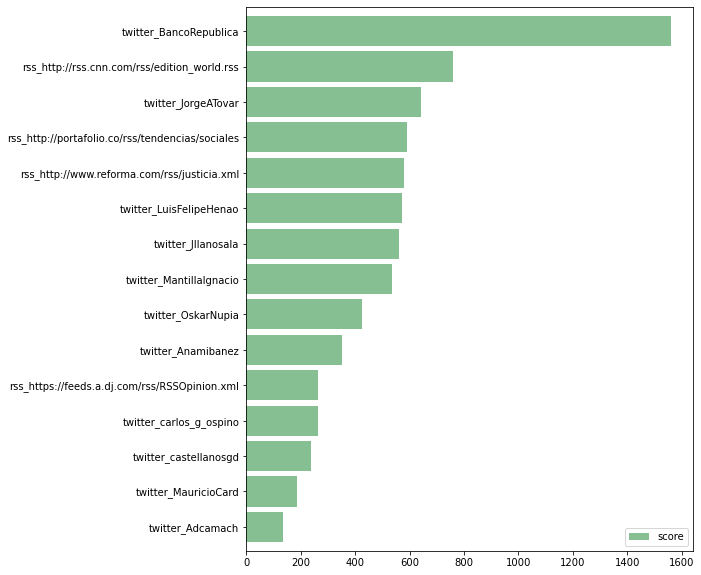

In [205]:
fs=modelo_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False).head(15)
fs.columns=['score']

ax = fs.sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [86]:
## Todas las variables

In [87]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [88]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:16.74420	validation_1-rmse:34.54172
[1]	validation_0-rmse:16.39353	validation_1-rmse:34.52142
[2]	validation_0-rmse:16.19790	validation_1-rmse:34.65054
[3]	validation_0-rmse:15.83521	validation_1-rmse:34.66445
[4]	validation_0-rmse:15.70890	validation_1-rmse:34.85292
[5]	validation_0-rmse:15.43790	validation_1-rmse:34.79032
[6]	validation_0-rmse:15.19235	validation_1-rmse:35.15248
[7]	validation_0-rmse:14.97917	validation_1-rmse:35.21846
[8]	validation_0-rmse:14.71910	validation_1-rmse:35.14362
[9]	validation_0-rmse:14.55353	validation_1-rmse:35.38601
[10]	validation_0-rmse:14.40011	validation_1-rmse:35.58156
[11]	validation_0-rmse:14.20669	validation_1-rmse:35.41725
[12]	validation_0-rmse:13.99797	validation_1-rmse:35.35874
[13]	validation_0-rmse:13.78406	validation_1-rmse:35.28623
[14]	validation_0-rmse:13.64531	validation_1-rmse:35.31407
[15]	validation_0-rmse:13.44122	validation_1-rmse:35.26510
[16]	validation_0-rmse:13.26086	validation_1-rmse:35.28888
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[56]	validation_0-rmse:8.16483	validation_1-rmse:37.75446
[57]	validation_0-rmse:8.06827	validation_1-rmse:37.91203
[58]	validation_0-rmse:7.93047	validation_1-rmse:37.99191
[59]	validation_0-rmse:7.81496	validation_1-rmse:37.84039
[60]	validation_0-rmse:7.72687	validation_1-rmse:37.90743
[61]	validation_0-rmse:7.68207	validation_1-rmse:37.92750
[62]	validation_0-rmse:7.55629	validation_1-rmse:37.81897
[63]	validation_0-rmse:7.52386	validation_1-rmse:37.82716
[64]	validation_0-rmse:7.42528	validation_1-rmse:37.76516
[65]	validation_0-rmse:7.31159	validation_1-rmse:37.72590
[66]	validation_0-rmse:7.25838	validation_1-rmse:37.70831
[67]	validation_0-rmse:7.21428	validation_1-rmse:37.76723
[68]	validation_0-rmse:7.19762	validation_1-rmse:37.79688
[69]	validation_0-rmse:7.07174	validation_1-rmse:37.84421
[70]	validation_0-rmse:7.00931	validation_1-rmse:37.85104
[71]	validation_0-rmse:6.95311	validation_1-rmse:37.78091
[72]	validation_0-rmse:6.87652	validation_1-rmse:37.69807
[73]	validatio

[196]	validation_0-rmse:2.10019	validation_1-rmse:38.66726
[197]	validation_0-rmse:2.06758	validation_1-rmse:38.65408
[198]	validation_0-rmse:2.05629	validation_1-rmse:38.63740
[199]	validation_0-rmse:2.04333	validation_1-rmse:38.63981
[200]	validation_0-rmse:2.02713	validation_1-rmse:38.64584
[201]	validation_0-rmse:2.01508	validation_1-rmse:38.67464
[202]	validation_0-rmse:1.99294	validation_1-rmse:38.70780
[203]	validation_0-rmse:1.98367	validation_1-rmse:38.71290
[204]	validation_0-rmse:1.96933	validation_1-rmse:38.70927
[205]	validation_0-rmse:1.94187	validation_1-rmse:38.70062
[206]	validation_0-rmse:1.91696	validation_1-rmse:38.70420
[207]	validation_0-rmse:1.91382	validation_1-rmse:38.72172
[208]	validation_0-rmse:1.89740	validation_1-rmse:38.71135
[209]	validation_0-rmse:1.87694	validation_1-rmse:38.70734
[210]	validation_0-rmse:1.86329	validation_1-rmse:38.69861
[211]	validation_0-rmse:1.84536	validation_1-rmse:38.69273
[212]	validation_0-rmse:1.83544	validation_1-rmse:38.678

[335]	validation_0-rmse:0.61323	validation_1-rmse:38.88676
[336]	validation_0-rmse:0.60609	validation_1-rmse:38.88468
[337]	validation_0-rmse:0.60631	validation_1-rmse:38.88206
[338]	validation_0-rmse:0.60018	validation_1-rmse:38.87980
[339]	validation_0-rmse:0.59488	validation_1-rmse:38.88257
[340]	validation_0-rmse:0.59272	validation_1-rmse:38.88815
[341]	validation_0-rmse:0.59188	validation_1-rmse:38.88707
[342]	validation_0-rmse:0.58144	validation_1-rmse:38.88670
[343]	validation_0-rmse:0.56958	validation_1-rmse:38.88344
[344]	validation_0-rmse:0.56923	validation_1-rmse:38.88551
[345]	validation_0-rmse:0.56214	validation_1-rmse:38.88360
[346]	validation_0-rmse:0.55809	validation_1-rmse:38.88376
[347]	validation_0-rmse:0.55038	validation_1-rmse:38.88525
[348]	validation_0-rmse:0.55010	validation_1-rmse:38.88251
[349]	validation_0-rmse:0.54075	validation_1-rmse:38.88484
[350]	validation_0-rmse:0.53199	validation_1-rmse:38.87494
[351]	validation_0-rmse:0.52507	validation_1-rmse:38.872

In [89]:
ypred=modelo_trm.predict(X_test_r)
ypred
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 38.87342903909992   MAPE: 1.5386905080971873


In [90]:
fs=modelo_trm.get_booster().get_fscore()
#fs

In [91]:
type(fs)

dict

In [92]:
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs

,0
rss_http://elnacional.com.do/feed/,913
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,328
rss_http://feeds.nytimes.com/nyt/rss/Technology,296
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,233
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml,200
...,...
twitter_BluRadioCo,2
twitter_RevistaSemana,2
twitter_rafaelpuyana,2
twitter_elespectador,2


In [93]:
fs.describe()

,0
count,157.000000
mean,38.159236
std,85.637841
min,1.000000
25%,9.000000
50%,17.000000
75%,36.000000
max,913.000000


In [94]:
fs.head(20)

,0
rss_http://elnacional.com.do/feed/,913
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,328
rss_http://feeds.nytimes.com/nyt/rss/Technology,296
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,233
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml,200
rss_http://feeds.nytimes.com/nyt/rss/Business,194
rss_http://portafolio.co/rss/mis-finanzas,186
rss_http://ep00.epimg.net/rss/economia/portada.xml,176
rss_http://feeds.washingtonpost.com/rss/rss_morning-mix,137
rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories,90


In [95]:
seleccionColumnas_xgb=fs.head(30).index.values

In [96]:
seleccionColumnas_xgb

array(['rss_http://elnacional.com.do/feed/',
       'rss_http://feeds.washingtonpost.com/rss/national/energy-environment',
       'rss_http://feeds.nytimes.com/nyt/rss/Technology',
       'rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://ep00.epimg.net/rss/economia/portada.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_morning-mix',
       'rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml',
       'twitter_Cesaretamayo',
       'rss_http://feeds.washingtonpost.com/rss/national',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'twitter_N

In [97]:
### modelo con variables seleccionadas

In [98]:
X_train_cf_xgb=X_train[seleccionColumnas_xgb]

In [99]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_xgb, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [100]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:16.70802	validation_1-rmse:34.53946
[1]	validation_0-rmse:16.39511	validation_1-rmse:34.27905
[2]	validation_0-rmse:16.22261	validation_1-rmse:34.21106
[3]	validation_0-rmse:15.92349	validation_1-rmse:34.54610
[4]	validation_0-rmse:15.75009	validation_1-rmse:34.42332
[5]	validation_0-rmse:15.43463	validation_1-rmse:34.53535
[6]	validation_0-rmse:15.21536	validation_1-rmse:34.57268
[7]	validation_0-rmse:15.04569	validation_1-rmse:34.89077
[8]	validation_0-rmse:14.77204	validation_1-rmse:34.85913
[9]	validation_0-rmse:14.61610	validation_1-rmse:34.96848
[10]	validation_0-rmse:14.48907	validation_1-rmse:35.00985
[11]	validation_0-rmse:14.20893	validation_1-rmse:34.91700
[12]	validation_0-rmse:13.99773	validation_1-rmse:34.81439
[13]	validation_0-rmse:13.78825	validation_1-rmse:34.88100
[14]	validation_0-rmse:13.63234	validation_1-rmse:34.94635
[15]	validation_0-rmse:13.52759	validation_1-rmse:34.72718
[16]	validation_0-rmse:13.34995	validation_1-rmse:34.78406
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[97]	validation_0-rmse:5.32510	validation_1-rmse:36.27558
[98]	validation_0-rmse:5.25882	validation_1-rmse:36.27687
[99]	validation_0-rmse:5.19740	validation_1-rmse:36.21818
[100]	validation_0-rmse:5.15200	validation_1-rmse:36.20569
[101]	validation_0-rmse:5.11094	validation_1-rmse:36.21264
[102]	validation_0-rmse:5.08052	validation_1-rmse:36.26147
[103]	validation_0-rmse:5.05754	validation_1-rmse:36.30397
[104]	validation_0-rmse:5.01236	validation_1-rmse:36.35375
[105]	validation_0-rmse:4.96453	validation_1-rmse:36.35332
[106]	validation_0-rmse:4.88229	validation_1-rmse:36.44163
[107]	validation_0-rmse:4.85052	validation_1-rmse:36.51746
[108]	validation_0-rmse:4.82313	validation_1-rmse:36.54443
[109]	validation_0-rmse:4.77048	validation_1-rmse:36.50507
[110]	validation_0-rmse:4.76269	validation_1-rmse:36.45982
[111]	validation_0-rmse:4.72968	validation_1-rmse:36.49929
[112]	validation_0-rmse:4.69198	validation_1-rmse:36.56860
[113]	validation_0-rmse:4.67057	validation_1-rmse:36.52939


[236]	validation_0-rmse:1.48005	validation_1-rmse:36.60368
[237]	validation_0-rmse:1.47507	validation_1-rmse:36.61857
[238]	validation_0-rmse:1.45481	validation_1-rmse:36.63008
[239]	validation_0-rmse:1.42754	validation_1-rmse:36.65466
[240]	validation_0-rmse:1.42383	validation_1-rmse:36.63942
[241]	validation_0-rmse:1.40235	validation_1-rmse:36.63118
[242]	validation_0-rmse:1.39575	validation_1-rmse:36.64893
[243]	validation_0-rmse:1.38558	validation_1-rmse:36.65176
[244]	validation_0-rmse:1.37115	validation_1-rmse:36.66229
[245]	validation_0-rmse:1.36475	validation_1-rmse:36.67125
[246]	validation_0-rmse:1.34600	validation_1-rmse:36.67877
[247]	validation_0-rmse:1.33886	validation_1-rmse:36.67620
[248]	validation_0-rmse:1.32415	validation_1-rmse:36.68738
[249]	validation_0-rmse:1.30829	validation_1-rmse:36.69709
[250]	validation_0-rmse:1.30356	validation_1-rmse:36.68812
[251]	validation_0-rmse:1.29852	validation_1-rmse:36.68742
[252]	validation_0-rmse:1.29222	validation_1-rmse:36.705

[375]	validation_0-rmse:0.44890	validation_1-rmse:36.85660
[376]	validation_0-rmse:0.44773	validation_1-rmse:36.85926
[377]	validation_0-rmse:0.44119	validation_1-rmse:36.85764
[378]	validation_0-rmse:0.43988	validation_1-rmse:36.85973
[379]	validation_0-rmse:0.43833	validation_1-rmse:36.86114
[380]	validation_0-rmse:0.43288	validation_1-rmse:36.86161
[381]	validation_0-rmse:0.43001	validation_1-rmse:36.86274
[382]	validation_0-rmse:0.42948	validation_1-rmse:36.86633
[383]	validation_0-rmse:0.42701	validation_1-rmse:36.86867
[384]	validation_0-rmse:0.42589	validation_1-rmse:36.87113
[385]	validation_0-rmse:0.41986	validation_1-rmse:36.87564
[386]	validation_0-rmse:0.41733	validation_1-rmse:36.87355
[387]	validation_0-rmse:0.40907	validation_1-rmse:36.86756
[388]	validation_0-rmse:0.40889	validation_1-rmse:36.86284
[389]	validation_0-rmse:0.40093	validation_1-rmse:36.85789
[390]	validation_0-rmse:0.39609	validation_1-rmse:36.85779
[391]	validation_0-rmse:0.39401	validation_1-rmse:36.856

In [101]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [102]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:16.70188	validation_1-rmse:34.36364
[1]	validation_0-rmse:16.39457	validation_1-rmse:34.11805
[2]	validation_0-rmse:16.26919	validation_1-rmse:33.98512
[3]	validation_0-rmse:15.96282	validation_1-rmse:33.73257
[4]	validation_0-rmse:15.75472	validation_1-rmse:33.50727
[5]	validation_0-rmse:15.48881	validation_1-rmse:33.63425
[6]	validation_0-rmse:15.25938	validation_1-rmse:33.38749
[7]	validation_0-rmse:15.06630	validation_1-rmse:33.48416
[8]	validation_0-rmse:14.75765	validation_1-rmse:33.53375
[9]	validation_0-rmse:14.57154	validation_1-rmse:33.43586
[10]	validation_0-rmse:14.36993	validation_1-rmse:33.29212
[11]	validation_0-rmse:14.20826	validation_1-rmse:33.31098
[12]	validation_0-rmse:14.00554	validation_1-rmse:33.25205
[13]	validation_0-rmse:13.75512	validation_1-rmse:33.01358
[14]	validation_0-rmse:13.66214	validation_1-rmse:32.72758
[15]	validation_0-rmse:13.60906	validation_1-rmse:32.56966
[16]	validation_0-rmse:13.43863	validation_1-rmse:32.77292
[17]	va

[140]	validation_0-rmse:3.77600	validation_1-rmse:29.81664
[141]	validation_0-rmse:3.77518	validation_1-rmse:29.88390
[142]	validation_0-rmse:3.71861	validation_1-rmse:29.82811
[143]	validation_0-rmse:3.65250	validation_1-rmse:29.77162
[144]	validation_0-rmse:3.61869	validation_1-rmse:29.72489
[145]	validation_0-rmse:3.58383	validation_1-rmse:29.75059
[146]	validation_0-rmse:3.52837	validation_1-rmse:29.74417
[147]	validation_0-rmse:3.48860	validation_1-rmse:29.72650
[148]	validation_0-rmse:3.44850	validation_1-rmse:29.68015
[149]	validation_0-rmse:3.40476	validation_1-rmse:29.65622
[150]	validation_0-rmse:3.38556	validation_1-rmse:29.65721
[151]	validation_0-rmse:3.35524	validation_1-rmse:29.67544
[152]	validation_0-rmse:3.33354	validation_1-rmse:29.68452
[153]	validation_0-rmse:3.30362	validation_1-rmse:29.61399
[154]	validation_0-rmse:3.28332	validation_1-rmse:29.61385
[155]	validation_0-rmse:3.25832	validation_1-rmse:29.62813
[156]	validation_0-rmse:3.24085	validation_1-rmse:29.602

[279]	validation_0-rmse:1.03849	validation_1-rmse:29.18189
[280]	validation_0-rmse:1.03153	validation_1-rmse:29.18437
[281]	validation_0-rmse:1.02358	validation_1-rmse:29.17688
[282]	validation_0-rmse:1.02030	validation_1-rmse:29.18110
[283]	validation_0-rmse:1.00599	validation_1-rmse:29.16285
[284]	validation_0-rmse:0.99258	validation_1-rmse:29.16577
[285]	validation_0-rmse:0.98022	validation_1-rmse:29.17758
[286]	validation_0-rmse:0.96968	validation_1-rmse:29.17287
[287]	validation_0-rmse:0.96901	validation_1-rmse:29.17216
[288]	validation_0-rmse:0.96471	validation_1-rmse:29.17133
[289]	validation_0-rmse:0.95164	validation_1-rmse:29.16523
[290]	validation_0-rmse:0.94418	validation_1-rmse:29.17205
[291]	validation_0-rmse:0.93876	validation_1-rmse:29.17219
[292]	validation_0-rmse:0.92284	validation_1-rmse:29.16031
[293]	validation_0-rmse:0.91454	validation_1-rmse:29.16048
[294]	validation_0-rmse:0.90655	validation_1-rmse:29.16335
[295]	validation_0-rmse:0.89388	validation_1-rmse:29.153

[418]	validation_0-rmse:0.33839	validation_1-rmse:29.13491
[419]	validation_0-rmse:0.33455	validation_1-rmse:29.13772
[420]	validation_0-rmse:0.33203	validation_1-rmse:29.13483
[421]	validation_0-rmse:0.32818	validation_1-rmse:29.13483
[422]	validation_0-rmse:0.32634	validation_1-rmse:29.13453
[423]	validation_0-rmse:0.32560	validation_1-rmse:29.13479
[424]	validation_0-rmse:0.32189	validation_1-rmse:29.13707
[425]	validation_0-rmse:0.31856	validation_1-rmse:29.13701
[426]	validation_0-rmse:0.31517	validation_1-rmse:29.13611
[427]	validation_0-rmse:0.31251	validation_1-rmse:29.13497
[428]	validation_0-rmse:0.31093	validation_1-rmse:29.13257
[429]	validation_0-rmse:0.30550	validation_1-rmse:29.13201
[430]	validation_0-rmse:0.30151	validation_1-rmse:29.13186
[431]	validation_0-rmse:0.30041	validation_1-rmse:29.12989
[432]	validation_0-rmse:0.29668	validation_1-rmse:29.12971
[433]	validation_0-rmse:0.29224	validation_1-rmse:29.13330
[434]	validation_0-rmse:0.29213	validation_1-rmse:29.132

In [103]:
ypred=modelo_trm_xgb.predict(X_test_r)
ypred

RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 29.10094129324948   MAPE: 1.4659980052777422


In [104]:
## DEFINITIVO

In [105]:
fs=modelo_trm_xgb.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs.columns=['score']
fs

,score
rss_http://feeds.washingtonpost.com/rss/sports,1209
twitter_BancoRepublica,803
twitter_BvcColombia,428
twitter_JorgeATovar,382
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml,374
rss_http://feeds.washingtonpost.com/rss/national,372
twitter_Jllanosala,301
twitter_MantillaIgnacio,297
twitter_LuisFelipeHenao,279
twitter_jrobertoacosta1,263


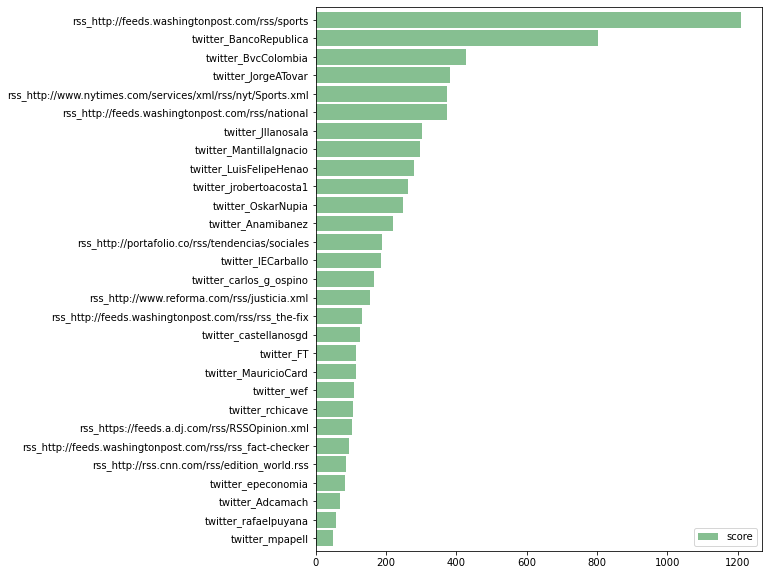

In [106]:
ax = fs.sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [ ]:
###grilla completa

In [186]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [188]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.04,0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8,50,80,200],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                       "n_estimators":[100, 200, 300, 400, 500,1000],
                        "objective":['reg:squarederror'],
                        "booster":['gbtree']
                       },
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [189]:
gsc.fit(X_train_r, y_train_r)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.3, 0.4],
                         'gamma': [0.0, 0.1, 0.2],
    

In [190]:
gsc.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 50,
 'min_child_weight': 1,
 'n_estimators': 300,
 'objective': 'reg:squarederror'}

In [191]:
modelo_xgb_trm = gsc.best_estimator_

In [192]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([ -7.117002  ,   3.406607  ,  -0.47453892, -13.067655  ,
        -9.729884  ,  -3.4200366 ,  -3.0550406 ,  -4.498514  ],
      dtype=float32)

In [193]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 37.15471822078452   MAPE: 2.249569446924225


In [ ]:
###grilla seleccionados

In [194]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [195]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.04,0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8,50,80,200],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                       "n_estimators":[100, 200, 300, 400, 500,1000],
                        "objective":['reg:squarederror'],
                        "booster":['gbtree']
                       },
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [196]:
gsc.fit(X_train_r, y_train_r)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.3, 0.4],
                         'gamma': [0.0, 0.1, 0.2],
    

In [197]:
gsc.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'reg:squarederror'}

In [198]:
modelo_xgb_trm = gsc.best_estimator_

In [199]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([-3.814961  ,  4.830778  ,  6.3037643 , -7.9473486 ,  2.2276728 ,
        5.5892377 ,  0.45113784, -4.074589  ], dtype=float32)

In [200]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 33.90418758849585   MAPE: 1.6242795426100596


# LGBM

In [107]:
from lightgbm import LGBMRegressor

In [108]:
#codificacion columnas

In [109]:
maestro_columnas=pd.DataFrame(X_train_cf.columns.values).reset_index()
maestro_columnas.columns=['cod','id']
maestro_columnas['cod']='cod_'+maestro_columnas['cod'].astype(str)
maestro_columnas

,cod,id
0,cod_0,rss_http://rss.cnn.com/rss/edition_world.rss
1,cod_1,rss_http://portafolio.co/rss/tendencias/sociales
2,cod_2,twitter_BancoRepublica
3,cod_3,rss_http://www.reforma.com/rss/justicia.xml
4,cod_4,twitter_LuisFelipeHenao
5,cod_5,twitter_JorgeATovar
6,cod_6,twitter_MantillaIgnacio
7,cod_7,twitter_Jllanosala
8,cod_8,rss_https://feeds.a.dj.com/rss/RSSOpinion.xml
9,cod_9,twitter_Adcamach


In [110]:
X_train_cf_lgbm=X_train_cf.copy()
X_train_cf_lgbm.columns=maestro_columnas['cod'].values
X_train_cf_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,cod_10,cod_11,cod_12,cod_13,cod_14
date,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.969,-0.724631,0.000000,0.000000,-0.455649,0.363951,-1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000
2021-12-31,0.000000,0.000,-0.936000,-0.884000,-0.711150,-0.397671,-0.170616,-0.832714,0.000000,0.000000,0.0000,0.000000,-0.810737,-0.54500,0.043000
2022-01-04,0.000000,0.000,-0.932500,0.000000,-0.550873,0.000000,0.264681,-1.000000,0.000000,-0.306333,-0.9140,-0.954000,-0.069407,-0.99450,0.000000
2022-01-05,0.000000,0.000,-0.721500,0.000000,-0.598374,0.000000,-0.103979,-0.512000,0.000000,0.000000,0.0000,0.000000,-0.450646,-0.99950,0.000000
2022-01-06,0.000000,0.000,-0.876667,0.000000,-0.718302,-0.718734,0.003502,-0.937600,0.000000,0.000000,0.0000,-0.991000,-0.809113,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.000000,0.000,-0.867500,-0.853273,-0.991750,-0.004000,0.699000,-0.999333,0.349231,0.000000,-0.1665,-0.929333,-0.619917,-0.99900,0.000000
2022-04-08,0.239600,0.000,-0.516429,-0.765182,-0.662064,-0.593667,-0.609143,-0.865875,-0.125696,0.000000,0.0000,-0.957000,-0.525062,0.37800,-0.156889
2022-04-11,0.082875,0.000,-0.844750,-0.967800,-0.666647,-0.701000,-0.105500,-0.999000,-0.039385,0.000000,0.3650,0.000000,-0.572143,0.00000,0.000000


In [111]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_lgbm, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [112]:
modeloLgbm_trm=LGBMRegressor(metric='rmse')

In [113]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[1]	training's rmse: 16.2389	valid_1's rmse: 35.9544
[2]	training's rmse: 16.0461	valid_1's rmse: 35.5912
[3]	training's rmse: 15.9143	valid_1's rmse: 35.4538
[4]	training's rmse: 15.7586	valid_1's rmse: 35.1414
[5]	training's rmse: 15.6513	valid_1's rmse: 35.0246
[6]	training's rmse: 15.5826	valid_1's rmse: 34.8127
[7]	training's rmse: 15.4522	valid_1's rmse: 35.0784
[8]	training's rmse: 15.3632	valid_1's rmse: 34.9751
[9]	training's rmse: 15.308	valid_1's rmse: 34.7863
[10]	training's rmse: 15.1872	valid_1's rmse: 34.5239
[11]	training's rmse: 15.1142	valid_1's rmse: 34.4073
[12]	training's rmse: 15.0109	valid_1's rmse: 34.6399
[13]	training's rmse: 14.9639	valid_1's rmse: 34.4682
[14]	training's rmse: 14.8326	valid_1's rmse: 34.1449
[15]	training's rmse: 14.7528	valid_1's rmse: 33.9815
[16]	training's rmse: 14.6602	valid_1's rmse: 34.3137
[17]	training's rmse: 14.6199	valid_1's rmse: 34.1579
[18]	training's rmse: 14.5588	valid_1's rmse: 34.1197
[19]	training's rmse: 14.4904	valid_1'

In [114]:
modeloLgbm_trm.score(X_train_r, y_train_r)

0.48657429738595737

In [115]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -7.15652319,  -1.67101388,  -3.6446281 , -15.33702404,
         4.37827056,  -1.89073794,   6.41304387,  -1.91347947])

In [116]:
# DEFINITIVO

In [117]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 32.34247737770264   MAPE: 2.4612370767572527


In [118]:
modeloLgbm_trm.feature_importances_

array([ 0,  0, 15, 19, 21, 13, 13,  8, 13,  0,  8,  9, 20, 20,  5])

In [119]:
maestro_columnas['score']=modeloLgbm_trm.feature_importances_

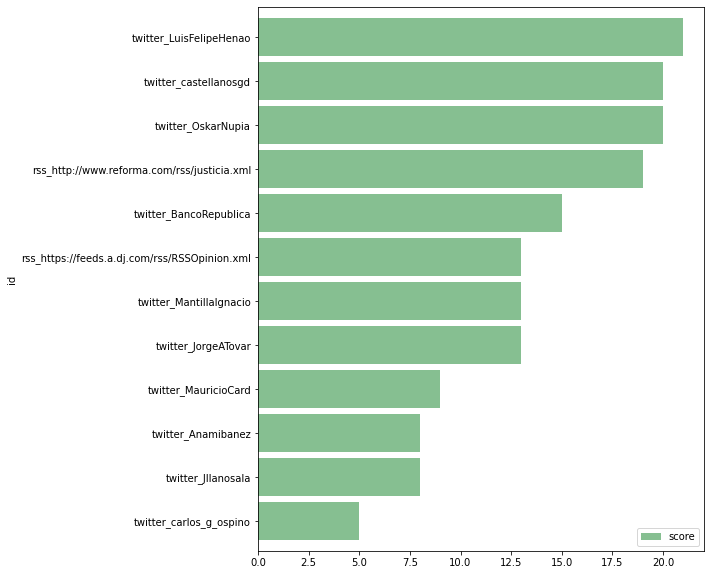

In [120]:
ax = maestro_columnas[maestro_columnas['score']>0].set_index('id').sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [121]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [122]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 16.1017	valid_1's rmse: 35.6956
[2]	training's rmse: 15.8882	valid_1's rmse: 35.4723
[3]	training's rmse: 15.7778	valid_1's rmse: 35.1208
[4]	training's rmse: 15.5603	valid_1's rmse: 35.5884
[5]	training's rmse: 15.3242	valid_1's rmse: 35.0752
[6]	training's rmse: 15.1703	valid_1's rmse: 34.8968
[7]	training's rmse: 15.0616	valid_1's rmse: 34.7585
[8]	training's rmse: 14.9066	valid_1's rmse: 35.3474
[9]	training's rmse: 14.8278	valid_1's rmse: 35.0574
[10]	training's rmse: 14.6691	valid_1's rmse: 34.6815
[11]	training's rmse: 14.534	valid_1's rmse: 34.4042
[12]	training's rmse: 14.4795	valid_1's rmse: 34.1665
[13]	training's rmse: 14.4263	valid_1's rmse: 34.2733
[14]	training's rmse: 14.2465	valid_1's rmse: 33.79
[15]	training's

In [123]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -7.19738749,  -2.49170639,  -5.18959136, -14.83065093,
         2.8007054 ,  -6.26994846,   6.37855076,  -0.57532662])

In [124]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 33.13252835193175   MAPE: 2.413465976253801


In [125]:
# todas las variables

In [126]:
maestro_columnas_t=pd.DataFrame(X_train.columns.values).reset_index()
maestro_columnas_t.columns=['cod','id']
maestro_columnas_t['cod']='cod_'+maestro_columnas_t['cod'].astype(str)
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_not...
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [127]:
X_train_t_lgbm=X_train.copy()
X_train_t_lgbm.columns=maestro_columnas_t['cod'].values
X_train_t_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_153,cod_154,cod_155,cod_156,cod_157,cod_158,cod_159,cod_160,cod_161,cod_162
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.000000,0.000000
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.871000,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.776667,0.000000,0.000000
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000000,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000000,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,-0.345333,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000000,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333


In [128]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_t_lgbm, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [129]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [130]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 16.1084	valid_1's rmse: 36.066
[2]	training's rmse: 15.4591	valid_1's rmse: 36.1554
[3]	training's rmse: 15.1524	valid_1's rmse: 36.226
[4]	training's rmse: 14.6695	valid_1's rmse: 36.2791
[5]	training's rmse: 14.4461	valid_1's rmse: 35.9406
[6]	training's rmse: 13.9628	valid_1's rmse: 36.9285
[7]	training's rmse: 13.655	valid_1's rmse: 37.0166
[8]	training's rmse: 13.284	valid_1's rmse: 36.6934
[9]	training's rmse: 13.1445	valid_1's rmse: 36.392
[10]	training's rmse: 12.8855	valid_1's rmse: 36.5236
[11]	training's rmse: 12.6437	valid_1's rmse: 37.0557
[12]	training's rmse: 12.5112	valid_1's rmse: 37.0904
[13]	training's rmse: 12.215	valid_1's rmse: 36.8548
[14]	training's rmse: 11.9924	valid_1's rmse: 37.1516
[15]	training's rm

In [131]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -5.13244445,  13.95242421,   0.18705691, -33.12740116,
       -20.59185212,  10.37122259, -16.1812444 ,  -3.40882373])

In [132]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 41.745244608123876   MAPE: 4.458243573001376


In [133]:
modeloLgbm_trm.feature_importances_

array([ 5,  0,  2,  0,  0,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  4, 10,  0,  2,  0,  5,  0,  0,  0,  1,
        0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  1,  0,  3,  0,  2,  0,  0,
        0,  0,  2,  2,  0,  0,  0,  0,  6,  0,  0,  0,  0,  1,  3,  3,  3,
        0,  1,  0,  0,  0,  4,  9,  0,  5,  0,  0,  0,  0,  0,  0,  0, 11,
        0,  0,  0,  0,  0,  0, 10,  1,  5,  3,  0,  0,  0,  0,  3,  3,  0,
        4,  0,  0,  0,  0,  2,  0,  0,  0,  2,  4,  4,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  7,  0,  0,  3,  0])

In [134]:
len(modeloLgbm_trm.feature_importances_)

163

In [135]:
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_not...
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [136]:
maestro_columnas_t['score']=modeloLgbm_trm.feature_importances_

In [137]:
maestro_columnas_t.sort_values('score',ascending=False).head(30)

,cod,id,score
118,cod_118,twitter_NoticiasRCN,11
42,cod_42,rss_http://www.nytimes.com/services/xml/rss/ny...,10
125,cod_125,twitter_RodLuisAlberto,10
108,cod_108,twitter_Maurotov,9
77,cod_77,rss_https://www.eltiempo.com/rss/mundo_latinoa...,8
19,cod_19,rss_http://portafolio.co/rss/mis-finanzas,7
158,cod_158,twitter_rcnradio,7
93,cod_93,twitter_Fondosdepension,6
0,cod_0,rss_http://elnacional.com.do/feed/,5
46,cod_46,rss_http://www.nytimes.com/services/xml/rss/ny...,5


In [138]:
selcollgmb=maestro_columnas_t.sort_values('score',ascending=False).head(30)['cod'].values
selcollgmb

array(['cod_118', 'cod_42', 'cod_125', 'cod_108', 'cod_77', 'cod_19',
       'cod_158', 'cod_93', 'cod_0', 'cod_46', 'cod_127', 'cod_53',
       'cod_110', 'cod_136', 'cod_107', 'cod_5', 'cod_147', 'cod_146',
       'cod_41', 'cod_101', 'cod_100', 'cod_99', 'cod_80', 'cod_133',
       'cod_134', 'cod_128', 'cod_161', 'cod_141', 'cod_82', 'cod_145'],
      dtype=object)

In [139]:
X_train_tc_lgbm=X_train_t_lgbm[selcollgmb]

In [140]:
X_train_tc_lgbm

,cod_118,cod_42,cod_125,cod_108,cod_77,cod_19,cod_158,cod_93,cod_0,cod_46,...,cod_100,cod_99,cod_80,cod_133,cod_134,cod_128,cod_161,cod_141,cod_82,cod_145
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000000,-0.412667,0.565884,0.000000,0.000000,0.000000,-0.384416,0.000000,0.000000,...,0.000000,-0.455649,0.000000,0.000000,0.00000,-0.641361,0.000000,-0.920000,-0.724631,-0.371000
2021-12-31,0.000000,-0.061850,-0.113825,-0.323506,0.000000,-0.978893,0.000000,-0.394441,0.000000,0.000000,...,-0.981000,-0.397671,0.000000,0.043000,-0.54500,0.086404,0.000000,0.009000,-0.936000,-0.378091
2022-01-04,0.000000,-0.431000,0.101000,-0.538976,0.000000,-0.270171,0.000000,-0.708421,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.99450,-0.532444,0.000000,-0.859833,-0.932500,-0.858750
2022-01-05,0.000000,-0.836000,0.000000,-0.172566,0.000000,0.000000,0.000000,-0.850880,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,-0.99950,-0.342434,0.000000,-0.622688,-0.721500,0.000000
2022-01-06,0.000000,-0.362025,-0.633000,0.526741,0.000000,-0.958863,0.000000,-0.675151,0.000000,0.000000,...,-0.523500,-0.718734,0.000000,0.000000,0.00000,-0.720221,-0.276211,0.153000,-0.876667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.660382,0.153000,0.000000,0.000000,-0.600375,0.667000,-0.439410,-0.998250,-0.356600,0.144714,...,-0.368500,-0.004000,-0.550606,0.000000,-0.99900,-0.597818,0.000000,-0.245333,-0.867500,0.000000
2022-04-08,-0.757097,-0.296000,-0.140111,-0.896667,-0.852091,-0.212500,-0.486162,-0.848571,-0.477067,-0.158444,...,-0.276333,-0.593667,-0.577680,-0.156889,0.37800,-0.535643,0.000000,0.053667,-0.516429,-0.733867
2022-04-11,-0.657678,-0.005333,-0.009667,-0.094588,-0.214000,-0.658500,-0.617303,-0.992667,-0.403324,-0.041667,...,-1.000000,-0.701000,-0.709881,0.000000,0.00000,-0.032333,0.000000,0.000000,-0.844750,0.000000


In [141]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_tc_lgbm, y_train, test_size = 0.1, random_state = 86, shuffle= True)

In [142]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [143]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 15.8404	valid_1's rmse: 36.4327
[2]	training's rmse: 15.3356	valid_1's rmse: 36.5685
[3]	training's rmse: 14.969	valid_1's rmse: 36.6721
[4]	training's rmse: 14.5674	valid_1's rmse: 36.4823
[5]	training's rmse: 14.1786	valid_1's rmse: 36.1145
[6]	training's rmse: 13.8957	valid_1's rmse: 36.0984
[7]	training's rmse: 13.5019	valid_1's rmse: 37.0231
[8]	training's rmse: 13.3504	valid_1's rmse: 36.6788
[9]	training's rmse: 13.0527	valid_1's rmse: 36.5878
[10]	training's rmse: 12.7722	valid_1's rmse: 36.5989
[11]	training's rmse: 12.6428	valid_1's rmse: 36.8003
[12]	training's rmse: 12.3414	valid_1's rmse: 37.58
[13]	training's rmse: 12.2081	valid_1's rmse: 37.6081
[14]	training's rmse: 11.9606	valid_1's rmse: 37.8637
[15]	training's

In [144]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -4.47652444,  14.40744616,  -3.05952072, -30.83693266,
       -22.45769732,  10.86073674, -17.73363045,  -5.00636219])

In [145]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 42.09323610461696   MAPE: 4.208911067935812


# Random Forest

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [149]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size =0.1, random_state = 86, shuffle= True)

In [150]:
modelo_rf_trm=regressor.fit(X_train_r, y_train_r)

In [151]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([-2.5505,  5.228 , -4.035 , -8.203 ,  7.7905,  3.5745,  6.2675,
       -4.124 ])

In [152]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 31.02398838197626   MAPE: 1.5906808059567008


In [153]:
modelo_rf_trm.feature_importances_

array([0.01323345, 0.0120278 , 0.09642703, 0.0470147 , 0.0563987 ,
       0.08401815, 0.07300143, 0.18709783, 0.04662235, 0.03047972,
       0.11234146, 0.03911443, 0.06586358, 0.08897773, 0.04738164])

Text(0.5, 0, 'Random Forest Feature Importance')

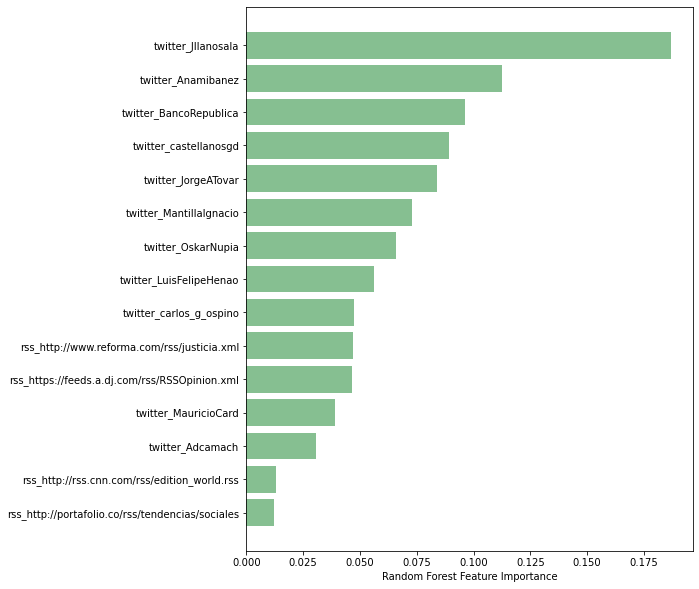

In [154]:
 #figsize=(8, 10), color='#86bf91', zorder=2, width=0.85
fig, ax = plt.subplots(figsize=(8, 10))
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
ax=plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx], color='#86bf91', zorder=2)
plt.xlabel("Random Forest Feature Importance")

In [155]:
###  grilla de busqueda

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [158]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [159]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_r, y_train_r)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [160]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [161]:
modelo_rf_trm=rf_random.best_estimator_

In [162]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([-14.11040461,  11.40842357, -12.08550893,  -3.20919093,
        20.0072096 ,  18.20732487,  17.91338947,   2.35306192])

In [163]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 21.369116359651215   MAPE: 0.7461931560413626


In [ ]:
### Grafico Random forest

Text(0.5, 0, 'Random Forest Feature Importance')

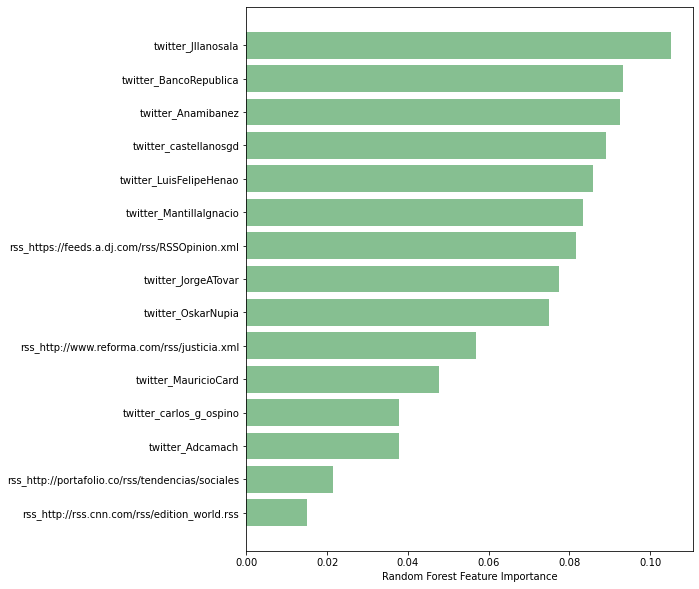

In [206]:
#figsize=(8, 10), color='#86bf91', zorder=2, width=0.85
fig, ax = plt.subplots(figsize=(8, 10))
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
ax=plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx], color='#86bf91', zorder=2)
plt.xlabel("Random Forest Feature Importance")

In [164]:
## grilla con validacion cruzada

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': [2, 3, 'sqrt','auto'],
    'min_samples_leaf': [1,2, 3, 4, 5],
    'min_samples_split': [2,4,5,8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 500,1000]
}

In [167]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [169]:
# Fit the grid search to the data
grid_search.fit(X_train_r, y_train_r)

Fitting 3 folds for each of 15840 candidates, totalling 47520 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': [2, 3, 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500, 1000]},
             verbose=2)

In [170]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 100}

In [171]:
modelo_rf_trm = grid_search.best_estimator_

In [172]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([-15.79852453,   8.99011144, -13.41342853,  -5.83312674,
        16.07268519,  16.40602187,  13.36133831,   3.40913539])

In [173]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 22.900745897242007   MAPE: 1.0749213751034987


Text(0.5, 0, 'Random Forest Feature Importance')

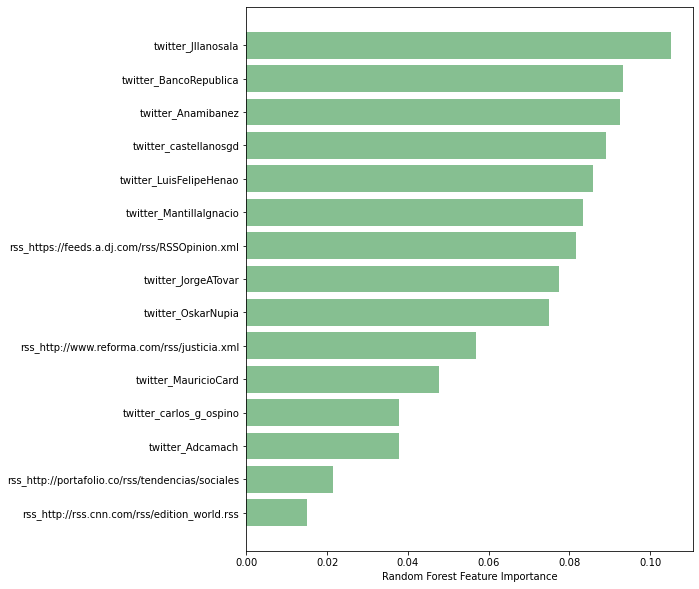

In [174]:
 #figsize=(8, 10), color='#86bf91', zorder=2, width=0.85
fig, ax = plt.subplots(figsize=(8, 10))
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
ax=plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx], color='#86bf91', zorder=2)
plt.xlabel("Random Forest Feature Importance")

In [175]:
#GUARDAR MODELO

In [176]:
from joblib import dump,load

In [177]:
ruta_modelo = f"modeloRF_oro.pkl"
dump(modelo_rf_trm, ruta_modelo)

['modeloRF_oro.pkl']